In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functions import * 

%matplotlib inline
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('Melbourne_housing_FULL.csv')


In [18]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [19]:
#format the column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34857 non-null  object 
 1   address        34857 non-null  object 
 2   rooms          34857 non-null  int64  
 3   type           34857 non-null  object 
 4   price          27247 non-null  float64
 5   method         34857 non-null  object 
 6   sellerg        34857 non-null  object 
 7   date           34857 non-null  object 
 8   distance       34856 non-null  float64
 9   postcode       34856 non-null  float64
 10  bedroom2       26640 non-null  float64
 11  bathroom       26631 non-null  float64
 12  car            26129 non-null  float64
 13  landsize       23047 non-null  float64
 14  buildingarea   13742 non-null  float64
 15  yearbuilt      15551 non-null  float64
 16  councilarea    34854 non-null  object 
 17  lattitude      26881 non-null  float64
 18  longti

# 1.-

In [21]:
#check the length of the dataset
prev_df = len(df)

In [22]:
#check for missing values
df['price'].isna().sum()

7610

In [23]:
df.dropna(subset=['price'], inplace=True) #drop the missing values

In [24]:
percetaje_data_loss = 1 - (df.shape[0] / prev_df ) #calculate the percentage of data loss
percetaje_data_loss

0.21832056688756918

In [32]:
df['price'] = df['price'].astype(int)#convert the price column to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         27247 non-null  object 
 1   address        27247 non-null  object 
 2   rooms          27247 non-null  int64  
 3   type           27247 non-null  object 
 4   price          27247 non-null  int64  
 5   method         27247 non-null  object 
 6   sellerg        27247 non-null  object 
 7   date           27247 non-null  object 
 8   distance       27246 non-null  float64
 9   postcode       27246 non-null  float64
 10  bedroom2       20806 non-null  float64
 11  bathroom       20800 non-null  float64
 12  car            20423 non-null  float64
 13  landsize       17982 non-null  float64
 14  buildingarea   10656 non-null  float64
 15  yearbuilt      12084 non-null  float64
 16  councilarea    27244 non-null  object 
 17  lattitude      20993 non-null  float64
 18  longtitude 

# 2.-

In [26]:
#most common type of property
df['type'].value_counts()

type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [27]:
# Frequency table for type of property
f_table_property = df['type'].value_counts()
f_table_property

type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [28]:
# CProportion of each unique value in the type column
p_table_property = df['type'].value_counts(normalize=True)
p_table_property

type
h    0.677946
u    0.216868
t    0.105186
Name: proportion, dtype: float64

# 3.-

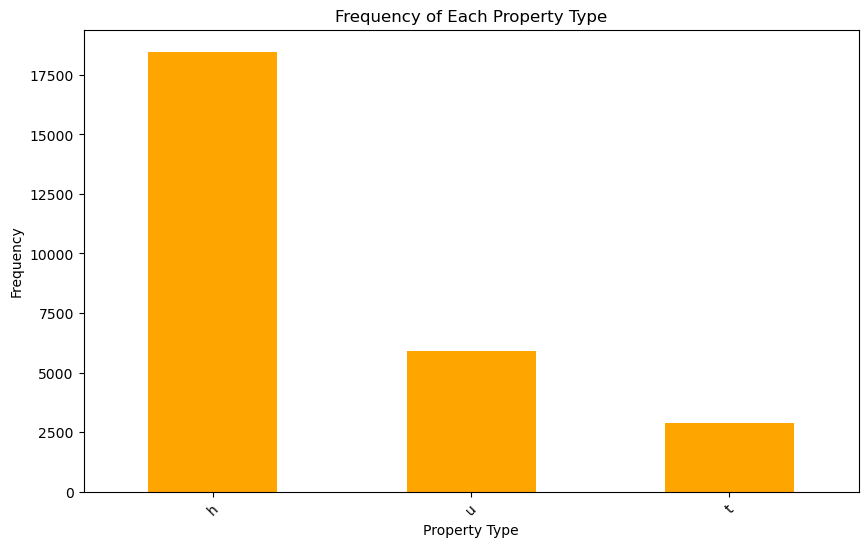

In [33]:
# Create a bar plot for the frequency of each property type in descending order
plt.figure(figsize=(10, 6))
f_table_property.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Frequency of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### The bar plot above illustrates the frequency of each property type in descending order. This graph technique is the most suitable and straightforward approach for this task, as it clearly shows the distribution of different property types.

# 4.- 

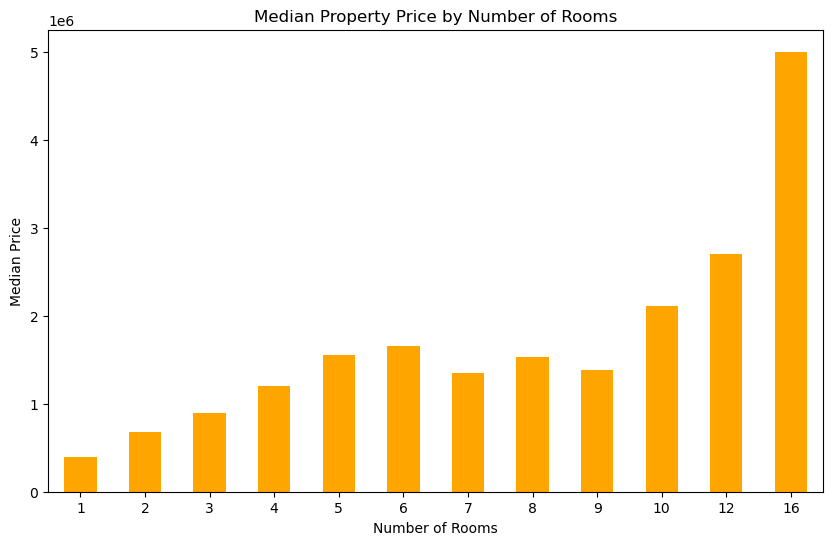

rooms
1      390000.0
2      678000.0
3      900000.0
4     1205250.0
5     1550000.0
6     1660000.0
7     1350000.0
8     1535883.0
9     1380000.0
10    2115000.0
12    2705000.0
16    5000000.0
Name: price, dtype: float64

In [35]:
# Calculate the median property price for each number of rooms
median_price_by_rooms = df.groupby('rooms')['price'].median()

# Create a bar plot for the median property price by number of rooms
plt.figure(figsize=(10, 6))
median_price_by_rooms.plot(kind='bar', color='orange')
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

# Display the median prices to analyze the trend
median_price_by_rooms

### The median property price generally increases with the number of rooms, but there are some exceptions where the price decreases or remains the same.

# 5.- 

In [38]:
from scipy.stats import spearmanr

# Drop rows with missing or infinite values in 'Rooms' or 'Price'
df_clean = df.dropna(subset=['rooms', 'price'])

# Recalculate the Spearman correlation coefficient between price and number of rooms
spearman_corr, _ = spearmanr(df_clean['rooms'], df_clean['price'])

spearman_corr

0.5042971590926004

### To use Spearman correlation, I removed rows with NaN values. The correlation between property price and rooms is 0.504, is moderate.

# 6.- 

/tmp/ipykernel_42277/3608367277.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_clean, x='distance', y='price', palette='viridis', alpha=0.5)


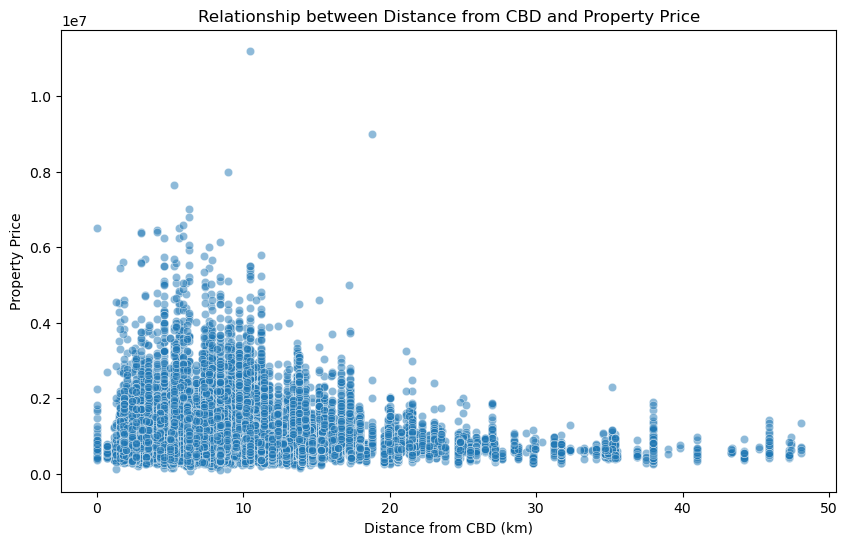

-0.18809341092744206

In [41]:
# Drop rows with missing values in 'Distance' or 'Price' columns
df_clean = df.dropna(subset=['distance', 'price'])

# Calculate the Spearman correlation coefficient between distance from CBD and property price
spearman_corr_distance, _ = spearmanr(df_clean['distance'], df_clean['price'])

# Create a scatter plot with the viridis palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='distance', y='price', palette='viridis', alpha=0.5)
plt.title('Relationship between Distance from CBD and Property Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price')
plt.show()

spearman_corr_distance


### The scatter plot above visualizes the relationship between the distance from the Central Business District (CBD) and property price using the viridis palette. The Spearman correlation coefficient remains approximately -0.188, indicating a weak negative correlation.

/tmp/ipykernel_42277/1876281803.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_clean, x='landsize', y='price', palette='viridis', alpha=0.5)


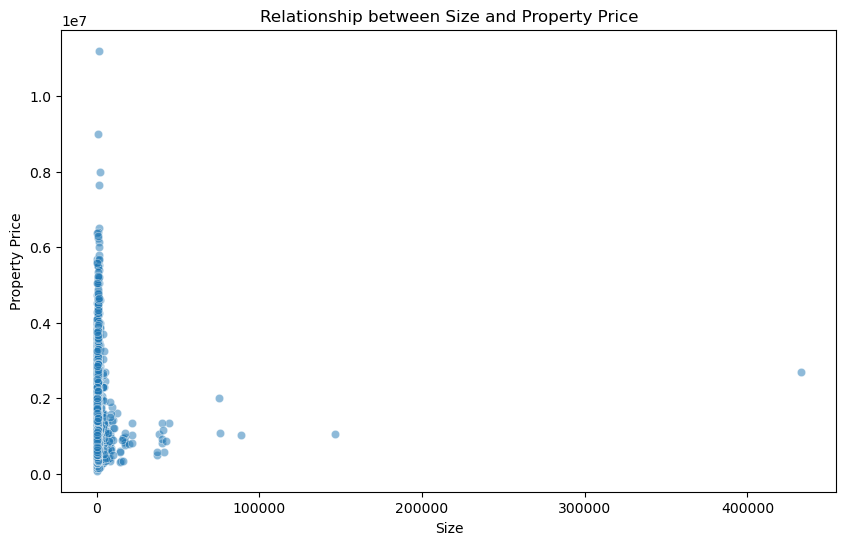

0.2766120625869772

In [45]:
# Drop rows with missing values in 'Distance' or 'Price' columns
df_clean = df.dropna(subset=['landsize', 'price'])

# Calculate the Spearman correlation coefficient between distance from CBD and property price
spearman_corr_distance, _ = spearmanr(df_clean['landsize'], df_clean['price'])

# Create a scatter plot with the viridis palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='landsize', y='price', palette='viridis', alpha=0.5)
plt.title('Relationship between Size and Property Price')
plt.xlabel('Size')
plt.ylabel('Property Price')
plt.show()

spearman_corr_distance

# 8.- 

In [50]:
# Drop rows with missing values in 'Landsize' or 'Price' columns
df_clean_land = df.dropna(subset=['landsize', 'price'])

In [52]:
# Perform quantile-based discretization of the 'Landsize' variable with q=7
df_clean_land.loc[:, 'landsize_category'] = pd.qcut(df_clean_land['landsize'], q=7)

/tmp/ipykernel_42277/999953371.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_landsize_category = df_clean_land.groupby('landsize_category')['price'].median()


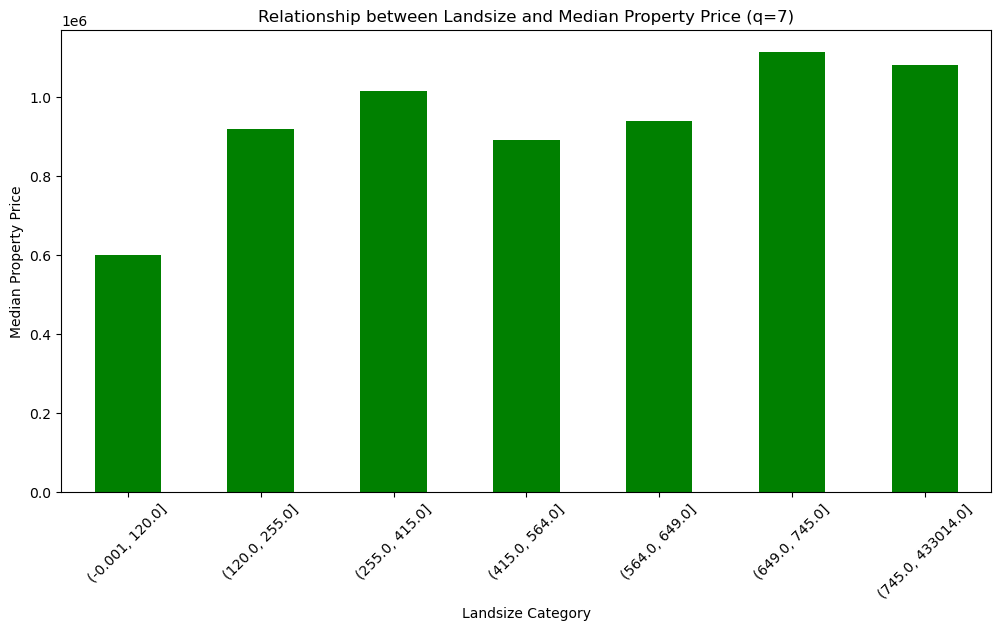

In [53]:
# Calculate the median property price for each landsize category
median_price_by_landsize_category = df_clean_land.groupby('landsize_category')['price'].median()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
median_price_by_landsize_category.plot(kind='bar', color='green')
plt.title('Relationship between Landsize and Median Property Price (q=7)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Property Price')
plt.xticks(rotation=45)
plt.show()

### The bar plot shows the relationship between landsize categories and the median property price with 𝑞 = 7. The relationship between landsize and median property price becomes more pronounced when using 𝑞=7 compared to a lower quantile value.

# 9.- 

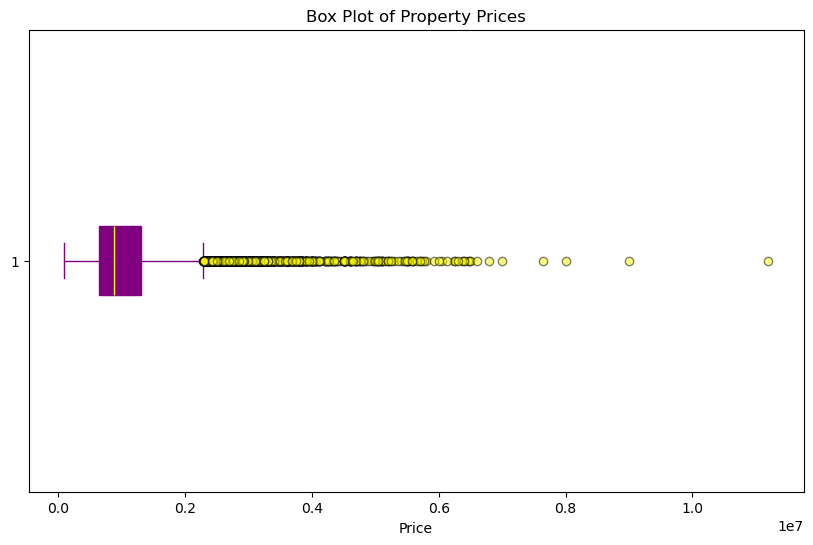

4.690424633904651

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Q1 and Q3 quartiles and the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

# Create a box plot to visualize the data and outliers using viridis color palette
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='purple', color='purple'),
            medianprops=dict(color='yellow'),
            whiskerprops=dict(color='purple'),
            capprops=dict(color='purple'),
            flierprops=dict(markerfacecolor='yellow', marker='o', color='yellow', alpha=0.5))
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.show()

percentage_outliers


### The box plot visualizes the property prices with outliers indicated. Using Tukey's method with a 1.5 threshold, approximately 3.69% of properties are identified as outliers.   

# 10.-

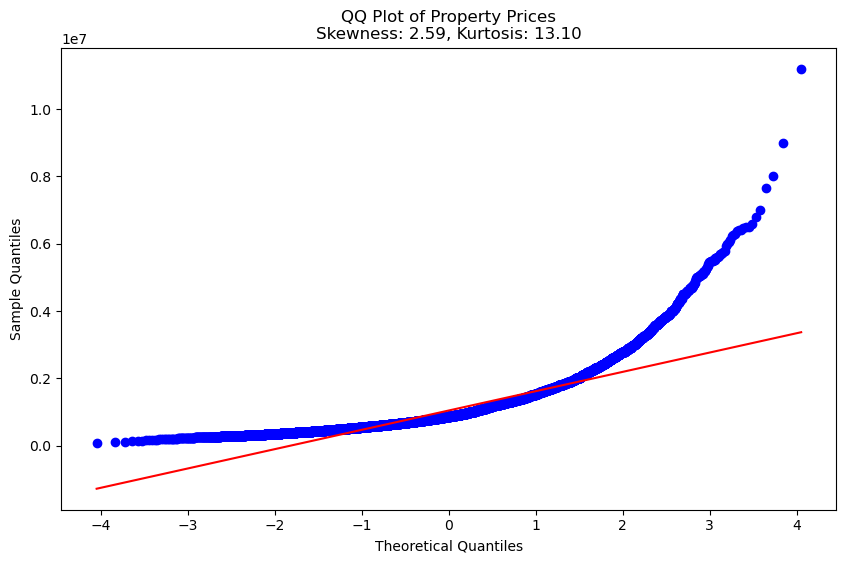

(2.5889693410528594, 13.097200515556374)

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()

# Create a QQ plot with viridis palette and include skewness and kurtosis in the title
plt.figure(figsize=(10, 6))
sns.set_palette("viridis")
stats.probplot(df['price'].dropna(), dist="norm", plot=plt)
plt.title(f'QQ Plot of Property Prices\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Display skewness and kurtosis
skewness, kurtosis



### The QQ plot above visualizes the property prices using the viridis palette and includes the skewness and kurtosis values in the title.

### Skewness: 2.59, indicating a positively skewed distribution.
### Kurtosis: 13.10.

# 11.- 

In [58]:
import scipy.stats as stats

# Perform the Kolmogorov-Smirnov test for normality
ks_statistic, p_value = stats.kstest(df['price'].dropna(), 'norm', args=(df['price'].mean(), df['price'].std()))

ks_statistic, p_value


(0.13751284953784154, 0.0)

### The Kolmogorov-Smirnov test for normality yields the following results:

### KS Statistic: 0.1375
### P-value: 0.0
### Given that the p-value is 0.0, which is less than any common significance level (e.g., 0.05), we reject the null hypothesis that the property price distribution is normally distributed.

### The correct conclusion is:

### The test results indicate that the distribution of property prices in the Melbourne housing market dataset is significantly different from a normal distribution.


# 12.- 

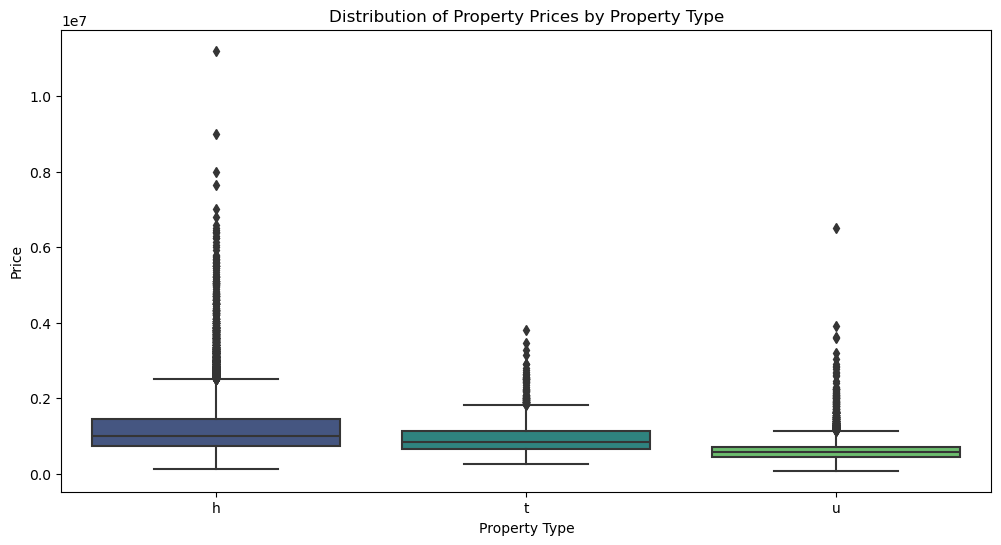

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to show the distribution of property prices for each property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=df, palette='viridis')
plt.title('Distribution of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()


### The box plot shows the distribution of property prices for each property type: houses (h), units (u), and townhouses (t). From the plot, we can observe that:

### Houses generally have higher property prices than units and townhouses.
### Units have lower property prices compared to houses and townhouses.
### Townhouses have property prices that are between those of houses and units, but closer to units.


# 13.-

In [63]:
# Calculate the median price for each region
median_price_by_region = df.groupby('regionname')['price'].median().sort_values()

# Identify the region with the highest and lowest median price
highest_median_region = median_price_by_region.idxmax()
lowest_median_region = median_price_by_region.idxmin()

print(f'Regions with the highest median property prices: {highest_median_region}')
print(f'Regions with the lowest median property prices: {lowest_median_region}')


Regions with the highest median property prices: Southern Metropolitan
Regions with the lowest median property prices: Western Victoria


### The region with the highest median price is Southern Metropolitan, and the region with the lowest median price is Western Victoria.

# 14.-

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Divide the price variable into five distinct ranges
price_bins = pd.qcut(df['price'], q=5, labels=False)

# Create a contingency table
contingency_table = pd.crosstab(df['regionname'], price_bins)

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Display results
chi2, p, dof, cramers_v


(5728.727443613416, 0.0, 28, 0.2292786672838293)

### The chi-square test results are as follows:

### Chi-square statistic: 5728.73
### P-value: 0.0
### Degrees of freedom: 28
### Cramer's V: 0.229
### Given the p-value of 0.0, which is less than any common significance level (e.g., 0.05), we reject the null hypothesis that there is no association between region and property price. The Cramer's V value of 0.229 indicates a medium-strength relationship according to Cohen's interpretation.

# 15.-

In [67]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y") #convert the date column to datetime with the correct format


In [68]:
import pandas as pd

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the earliest and latest year
earliest_year = df['date'].dt.year.min()
latest_year = df['date'].dt.year.max()

# Calculate median price for the earliest and latest year
median_price_earliest_year = df[df['date'].dt.year == earliest_year]['price'].median()
median_price_latest_year = df[df['date'].dt.year == latest_year]['price'].median()

# Calculate percentage change
percentage_change = ((median_price_latest_year - median_price_earliest_year) / median_price_earliest_year) * 100

earliest_year, latest_year, median_price_earliest_year, median_price_latest_year, percentage_change

(2016, 2018, 885000.0, 836500.0, -5.480225988700565)

### The percentage change in the median price of properties sold between the earliest year (2016) and the latest year (2018) is approximately -5.48%.



# 16.- 


In [69]:
# Extract the month from the date
df['month'] = df['date'].dt.month

# Calculate the number of houses sold per month
houses_sold_per_month = df['month'].value_counts().sort_index()

# Identify the month with the highest number of houses sold
most_houses_sold_month = houses_sold_per_month.idxmax()

houses_sold_per_month, most_houses_sold_month


(month
 1      649
 2     2067
 3     2362
 4     1206
 5     2620
 6     2425
 7     2359
 8     2324
 9     3219
 10    3118
 11    3408
 12    1490
 Name: count, dtype: int64,
 11)

### The month with the highest number of houses sold is March.